In [66]:
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import StandardScaler

In [67]:
def read_data(file):
    with open(file, 'r') as f:
        data = f.read() 
    bs_data = bs(data, 'xml') 
    return bs_data

    
def calc_euclidian_distances(bs_data):
    b_name = bs_data.find_all('name')

    attribute_values = []
    attributes = []
    for i in range(len(b_name)):
        attributes.append(b_name[i].get('value'))

    attributes = list(set(attributes))
    for i in range(int(len(b_name)/4)):
        a1 = b_name[i].find_all('component')[0].get('data')
        b1 = b_name[i].find_all('component')[1].get('data')
        c1 = b_name[i].find_all('component')[2].get('data')
        a1 = np.asarray([float(x) for x in a1.split(',')])
        b1 = np.asarray([float(x) for x in b1.split(',')])
        c1 = np.asarray([float(x) for x in c1.split(',')])
        r = (a1**2 + b1**2 + c1**2)**0.5
        # print(a1)
        attribute_values.append(r)

    final_attribute_values = []
    for i in range(int(len(attribute_values))):
        final_attribute_values.append((attribute_values[i]))

    collection = {}
    for i in range(len(final_attribute_values)):
        collection[attributes[i]] = final_attribute_values[i]
    df = pd.DataFrame(collection)
    return df

In [68]:
import os
df_list = []
for xml_file in os.listdir("../Timeseries"):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        b_name = read_data("../Timeseries/" + xml_file)
        try:
            df1 = calc_euclidian_distances(b_name)
            df_list.append(df1)
        except:
            print(xml_file + " failed to compute")
        #print(df1['Right Pelvic Angles'], df1['Left Pelvic Angles'])
        #break

timeseries-11.xml failed to compute
timeseries-45.xml failed to compute
timeseries-6.xml failed to compute


 fail :(
 fail :(
 fail :(


Text(0, 0.5, 'Lefts')

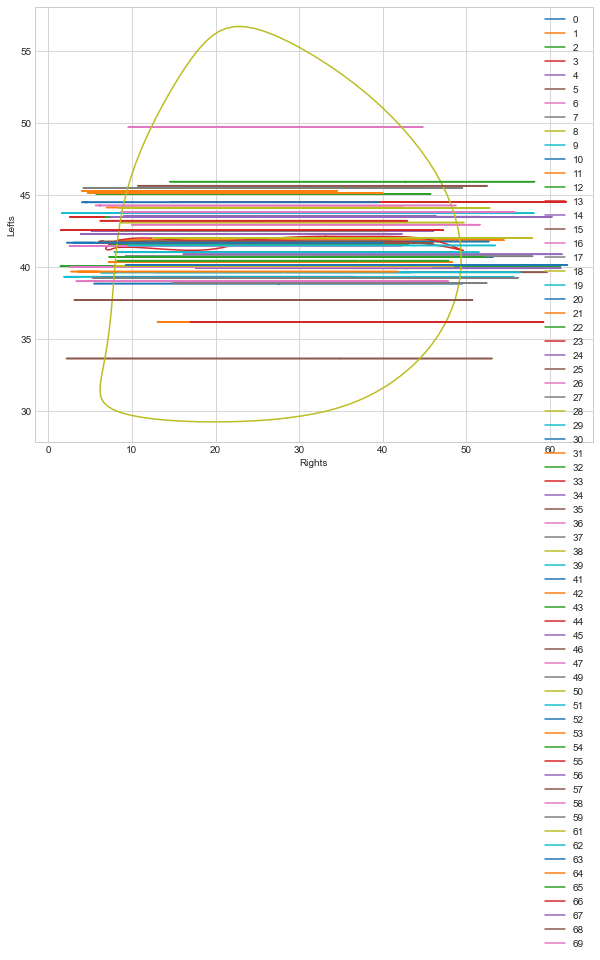

In [74]:
plt.figure(figsize = (10,8))
index = 0

for person in df_list:
    try: 
        plt.plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print(" fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')

,L_FM2_VLab,Left Knee Angles,Left Foot Contact Angle,Left_Knee_Ankle_distance,Right Pelvic Angles,Left Shoulder_Pelvis Angle,Trunk Angles,L_FCC_VLab,Right Ankle Angles,Left Foot Progression,...,R_FM2_VLab,Left Trunk Angles,Right Wrist Angles,Right Shoulder_Pelvis Angle,Left Shoulder Angles,Right Foot Progression,Left Pelvic Angles,Right Hip Angles,Right Shoulder Angles,Right_Knee_Ankle_distance
0,48.838333,70.094902,60.852965,10.390676,35.451195,35.451195,77.785427,107.455922,6.025199,75.608243,...,77.517370,108.766431,6.367719,78.836370,37.125451,27.367194,40.740671,25.505077,40.622128,45.582542
1,48.850023,69.769906,60.194131,10.425659,33.990969,33.990969,78.125317,106.784772,5.971598,75.549437,...,77.956893,108.328057,6.280727,78.646630,37.162541,27.414065,40.740664,25.449985,40.687014,45.605414
2,48.859574,69.493739,59.605733,10.461261,32.527327,32.527327,78.340289,105.957821,5.910841,75.517652,...,78.282578,107.732660,6.182012,78.485346,37.209648,27.458796,40.740622,25.414397,40.764529,45.643529
3,48.868012,69.269491,59.090968,10.498824,31.066106,31.066106,78.428315,104.979689,5.843391,75.515745,...,78.492232,106.983844,6.075619,78.354607,37.266496,27.501093,40.740596,25.395164,40.853391,45.695317
4,48.876674,69.100426,58.653329,10.540111,29.613370,29.613370,78.387830,103.855438,5.770114,75.545100,...,78.583364,106.084857,5.965446,78.255148,37.332582,27.540687,40.740568,25.389844,40.952113,45.758841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,49.064355,71.824900,64.080508,10.321715,41.050684,41.050684,75.421455,108.584791,6.290709,75.783552,...,74.854117,109.108435,6.650562,79.757490,36.911367,27.146651,40.736775,26.026189,40.295174,45.646316
97,49.093401,71.332904,63.183438,10.332239,39.672981,39.672981,76.208454,108.535559,6.261008,75.684311,...,75.716009,109.296894,6.634937,79.507564,36.904421,27.191532,40.737001,25.851459,40.303204,45.604982
98,49.119816,70.877687,62.340378,10.356926,38.269945,38.269945,76.891686,108.331023,6.224561,75.590084,...,76.478501,109.329768,6.598711,79.267616,36.907789,27.238263,40.737186,25.712147,40.325436,45.578425
99,49.143029,70.461799,61.555686,10.389130,36.847392,36.847392,77.465134,107.969727,6.181404,75.505169,...,77.137140,109.205075,6.542846,79.042355,36.921623,27.285976,40.737349,25.604056,40.361899,45.567483
